In [36]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customers/BankChurners.csv


In [37]:
pip install evalml

Note: you may need to restart the kernel to use updated packages.


In [38]:
import evalml
import numpy as np
import pandas as pd

In [39]:
data = pd.read_csv('../input/credit-card-customers/BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [40]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [41]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [42]:
data.shape

(10127, 23)

**The first thing we'll do is drop CLIENTNUM from the data since a unique client identifier will have no correlation with attrition rates. Now there's clearly some diversity in the types of features, and at first glace it looks like we don't have to worry about any null or missing values. But that seems unlikely with a dataset of this size.**

In [43]:
data = data.drop(['CLIENTNUM'], axis=1)

In [44]:
for feature in data.columns:
    if data[feature].dtype not in ['int64', 'float64']:
        print(f'{feature}: {data[feature].unique()}')

Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


**Education_Level, Marital_Status, and Income_Category have Unknown as a value. This is something we'll have to remember before we get to the model training, since Unknown isn't an acceptable value for any of the features.**

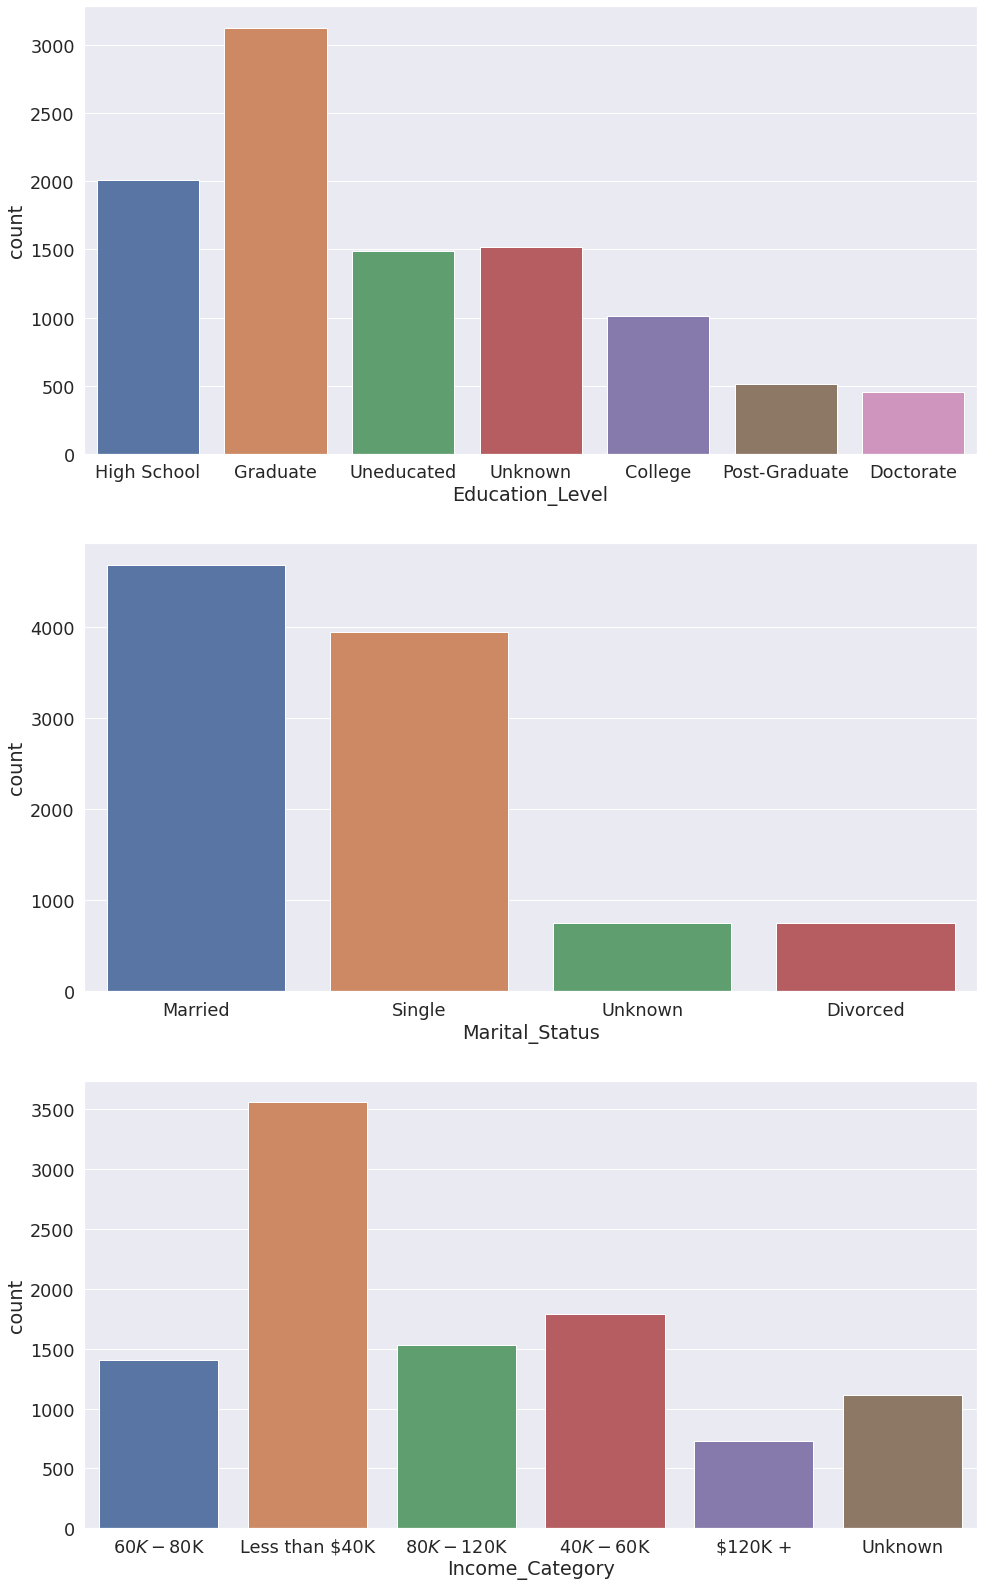

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 28))
sns.set(font_scale=1.6)
cols_ = ["Education_Level", "Marital_Status", "Income_Category"]

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=data, ax=ax[ind])

**Checking to see how prevalent Unknown is proportionally to the the other values. Based on the count plots above, it doesn't look like Unknown is the most common value, but it's frequency is high enough that we probably don't want to drop rows containing it altogether.**

In [46]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [47]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)

**We're also going to take a look at the correlation matrix to see if there are any features that are too closely tied to others. It looks like Avg_Open_To_Buy is perfectly correlated with Credit_Limit, so we're going to drop the latter.**

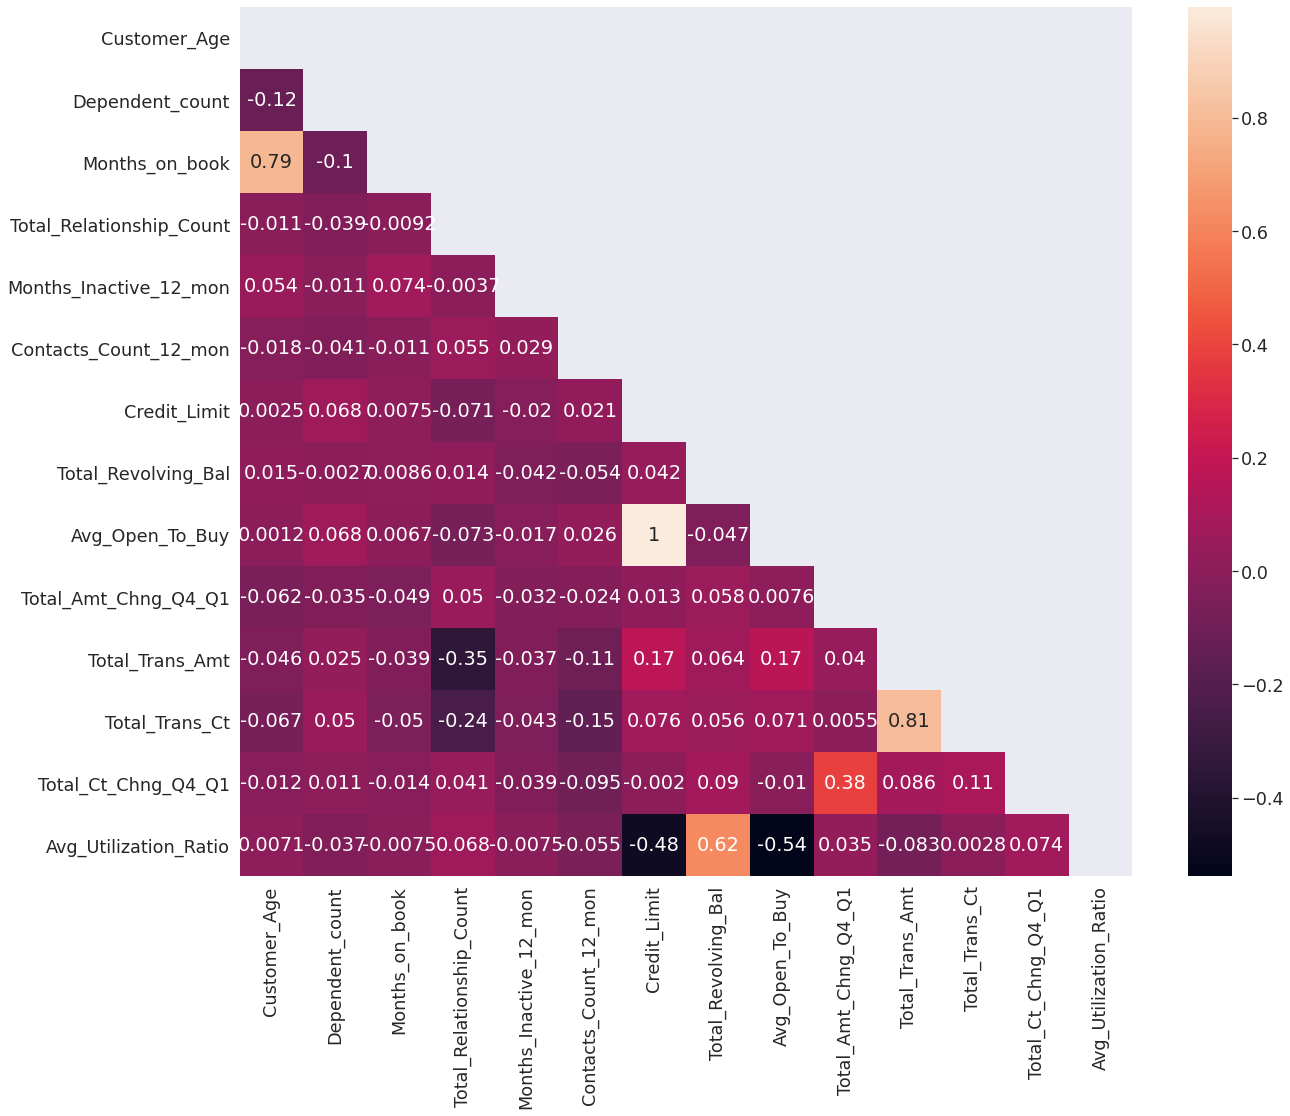

In [48]:
fig, ax = plt.subplots(figsize=(20, 16))
df_corr = data.corr(method="pearson")
mask = np.zeros_like(np.array(df_corr))
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask=mask, annot=True)

In [49]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [71]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

**The target feature is imbalanced so we will consider F1-score as our metric.**

**Encoding**

In [50]:
X = data.copy()
X = X.drop(['Credit_Limit'], axis=1) # dropping Credit Limit since it is highly correlated with Avg_Open_To_Buy
y = X.pop('Attrition_Flag')

X['Income_Category'] = X['Income_Category'].replace({'Less than $40K':0,
                                                     '$40K - $60K':1,
                                                     '$60K - $80K':2,
                                                     '$80K - $120K':3,
                                                     '$120K +':4})
X['Card_Category'] = X['Card_Category'].replace({'Blue':0,
                                                 'Silver':1,
                                                 'Gold':2,
                                                 'Platinum':3})
X['Education_Level'] = X['Education_Level'].replace({'Uneducated':0,
                                                     'High School':1,
                                                     'College':2,
                                                     'Graduate':3,
                                                     'Post-Graduate':4,
                                                     'Doctorate':5})

**Encoding the Target feature**

In [ ]:
y = y.replace({'Existing Customer':0,
               'Attrited Customer':1})

**Replacing the Unknown values that we saw earlier with the most frequent value encountered in that feature using SimpleImputer.**

In [51]:
from evalml.pipelines.components.transformers.imputers.simple_imputer import SimpleImputer

def preprocessing(X, y):
    imputer = SimpleImputer(impute_strategy="most_frequent", missing_values="Unknown")
    X = imputer.fit_transform(X, y)
    return X

X = preprocessing(X, y)

In [53]:
from evalml.utils import infer_feature_types

In [55]:
X = infer_feature_types(X, feature_types={'Income_Category': 'categorical',
                                          'Education_Level': 'categorical'})
X

,Physical Type,Logical Type,Semantic Tag(s)
Data Column,,,
Customer_Age,Int64,Integer,['numeric']
Gender,category,Categorical,['category']
Dependent_count,Int64,Integer,['numeric']
Education_Level,category,Categorical,['category']
Marital_Status,category,Categorical,['category']
Income_Category,category,Categorical,['category']
Card_Category,Int64,Integer,['numeric']
Months_on_book,Int64,Integer,['numeric']
Total_Relationship_Count,Int64,Integer,['numeric']


**Splitting the dataset into 80% train and 20% test.**

In [56]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary',test_size=.2)

**Initializing AutoMLSearch from EvalML**

In [58]:
from evalml import AutoMLSearch

automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type="binary", objective="F1", 
                      allowed_model_families=['random_forest' , 'xgboost', 'lightgbm'],
                      additional_objectives=['accuracy binary'], max_batches=5)
automl.search()

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 5 batches for a total of 24 pipelines. 
Allowed model families: random_forest, lightgbm, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/24) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean F1: 0.000
Batch 1: (2/24) LightGBM Classifier w/ Imputer + One ... Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean F1: 0.891
Batch 1: (3/24) XGBoost Classifier w/ Imputer + One H... Elapsed:00:04
	Starting cross validation
	Finished cross validation - mean F1: 0.897
Batch 1: (4/24) Random Forest Classifier w/ Imputer +... Elapsed:00:08
	Starting cross validation
	Finished cross validation - mean F1: 0.798
Batch 2: (5/24) XGBoost Classifier w/ Imputer + One H... Elapsed:00:12
	Starting cross validation
	Finished cross validation - mean F1: 0.873
Batch 2: (6/24) XGBoost Classifier w/ Imputer + One H... Elapsed:00:17
	Starting cross validation
	Finished cross validation - mean F1: 0.819
Batch 2: (7/24) XGBoost Classifier w/ Imputer + One H... Elapsed:00:20
	Starting cross validation
	Finished cross validation - mean F1: 0.883
Batch 

**Pipelines Review**

So a lot just happened, let's review the pipelines that were created and tested. We can see that the best performing pipeline was with the LightGBM estimator. We want to learn a little more about it, which can be done with the describe_pipeline function. Notice that the pipeline included a preprocessing step of imputation. In this case, it ended up being unnecessary because of our earlier SimpleImputer and our lack of null values for our numerical features. However AutoMLSearch comes with the built-in capacity to automatically iterate over the hyperparameters for this preprocessing step as well.

In [59]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,XGBoost Classifier w/ Imputer + One Hot Encoder,0.896504,0.904206,89.650420,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,1,LightGBM Classifier w/ Imputer + One Hot Encoder,0.890982,0.896635,89.098193,False,{'Imputer': {'categorical_impute_strategy': 'm...
15,3,Random Forest Classifier w/ Imputer + One Hot ...,0.797944,0.798111,79.794409,False,{'Imputer': {'categorical_impute_strategy': 'm...
23,0,Mode Baseline Binary Classification Pipeline,0.000000,0.000000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


**Obtaining the complete pipeline of the best model**

In [60]:
best_pipeline_ = automl.best_pipeline
automl.describe_pipeline(automl.rankings.iloc[1]["id"])

****************************************************
* LightGBM Classifier w/ Imputer + One Hot Encoder *
****************************************************

Problem Type: binary
Model Family: LightGBM

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
3. LightGBM Classifier
	 * boosting_type : gbdt
	 * learning_rate : 0.1
	 * n_estimators : 100
	 * max_depth : 0
	 * num_leaves : 31
	 * min_child_samples : 20
	 * n_jobs : -1
	 * bagging_freq : 0
	 * bagging_fraction : 0.9

Training
Training for binary problems.
Objective to optimize binary classification pipeline thresholds for: <evalml.objectives.standard_metrics.F1 object at 0x7f3902092f10>
Total training time (including CV): 3.2 seconds

Cross Validat

**We got the best classifier with LightGBM Classifier.**

In [61]:
best_pipeline_.fit(X_train, y_train)
predictions = best_pipeline_.predict(X_test)

In [62]:
from evalml.model_understanding.graphs import (
    graph_binary_objective_vs_threshold, 
    graph_permutation_importance, 
    graph_confusion_matrix
)

graph_binary_objective_vs_threshold(best_pipeline_, X_test, y_test, "F1")

In [63]:
graph_permutation_importance(best_pipeline_, X_test, y_test, "F1")

**Total Trans Ct is giving us the highest permutation importance score followed by Total Trans Amt.**

In [70]:
graph_confusion_matrix(y_test, predictions)

**We are getting (1685+273) = 1958 correct observations and (52+16) = 68 incorrect observations.**

In [65]:
from evalml.objectives.standard_metrics import AccuracyBinary, AUC, F1, PrecisionWeighted, Recall

acc = AccuracyBinary()
auc = AUC()
f1 = F1()
pre_w = PrecisionWeighted()
rec = Recall()

print(f"Accuracy (Binary): {acc.score(y_true=y_test, y_predicted=predictions)}")
print(f"Area Under Curve: {auc.score(y_true=y_test, y_predicted=predictions)}")
print(f"F1: {f1.score(y_true=y_test, y_predicted=predictions)}")
print(f"Precision (Weighted): {pre_w.score(y_true=y_test, y_predicted=predictions)}")
print(f"Recall: {rec.score(y_true=y_test, y_predicted=predictions)}")

Accuracy (Binary): 0.9664363277393879
Area Under Curve: 0.9152968841857729
F1: 0.8892508143322476
Precision (Weighted): 0.9659845215313323
Recall: 0.84


**We are getting an F1-score of 0.88 on the test set which is pretty good.**